In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
from scipy import stats
from math import sqrt
%matplotlib inline

In [88]:
df = pd.read_csv("D:\Proyecto POO\student+performance\student\student-por.csv", sep = ';')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [89]:
print("Data Shape: number of Rows = {0}, number of Columns = {1}".format(df.shape[0],df.shape[1]))

Data Shape: number of Rows = 649, number of Columns = 33


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### **Data Cleaning**

In [91]:
# revision de valores faltantes
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [92]:
# revision de duplicados
df.duplicated().value_counts()

False    649
Name: count, dtype: int64

##### **One-Hot Encoding**

In [93]:
# Listado de columnas a codificar
Columns = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", 
           "reason", "guardian", "schoolsup", "famsup", "paid", 
           "activities", "nursery", "higher", "internet", "romantic"]

# Aplica One-Hot Encoding a las columnas seleccionadas y actualizar el dataframe original
df = pd.get_dummies(df, columns=Columns)

# Visualiza el resultado para comprobar las nuevas columnas
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [94]:
# Guarda las columnas del DataFrame de entrenamiento
columnas_entrenamiento = df.columns
joblib.dump(columnas_entrenamiento, 'columnas_entrenamiento.pkl')
print(columnas_entrenamiento)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')


Text(0.5, 1.0, 'Mapa de Calor de Correlación')

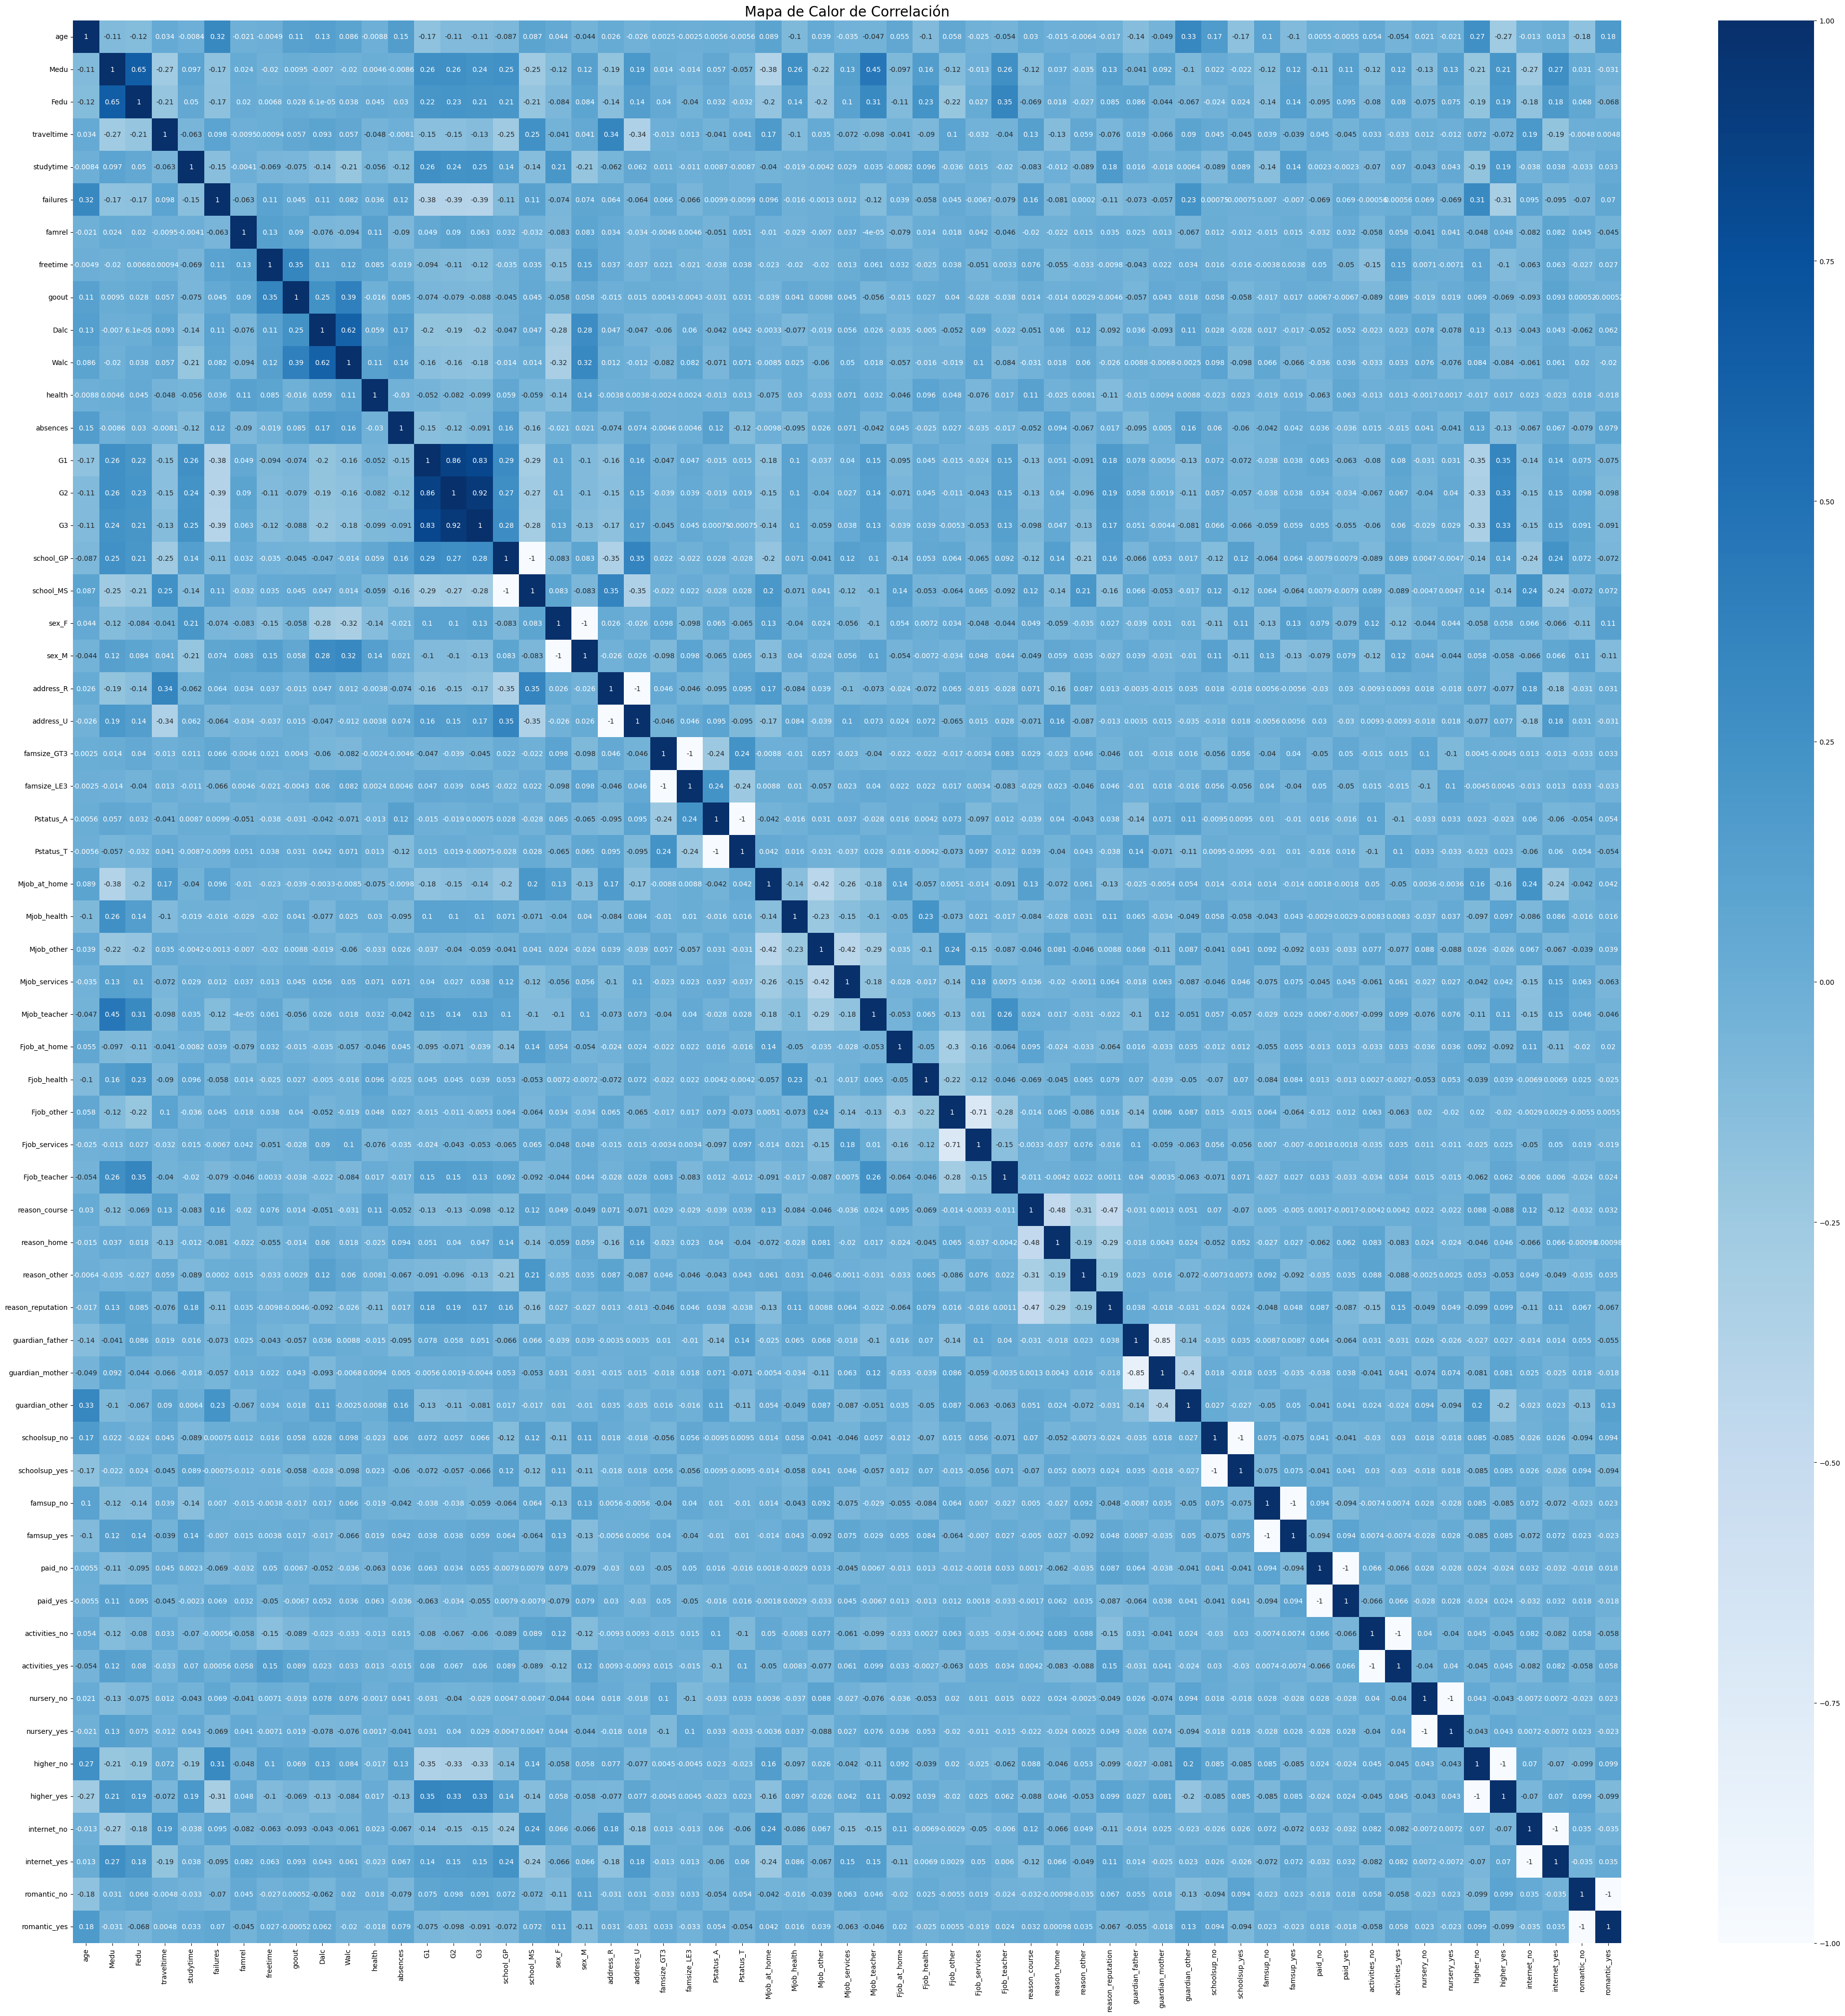

In [95]:
# Calcula la matriz de correlación
corr = df.corr()

# Crea una figura con un tamaño grande
plt.figure(figsize=(50,50))

# Dibuja el mapa de calor usando seaborn, con anotaciones y un mapa de colores azul
sns.heatmap(corr, annot=True, cmap="Blues")

# Establece el título de la gráfica
plt.title('Mapa de Calor de Correlación', fontsize=20)

#### **Eliminar valores atipicos**

<Axes: xlabel='G1'>

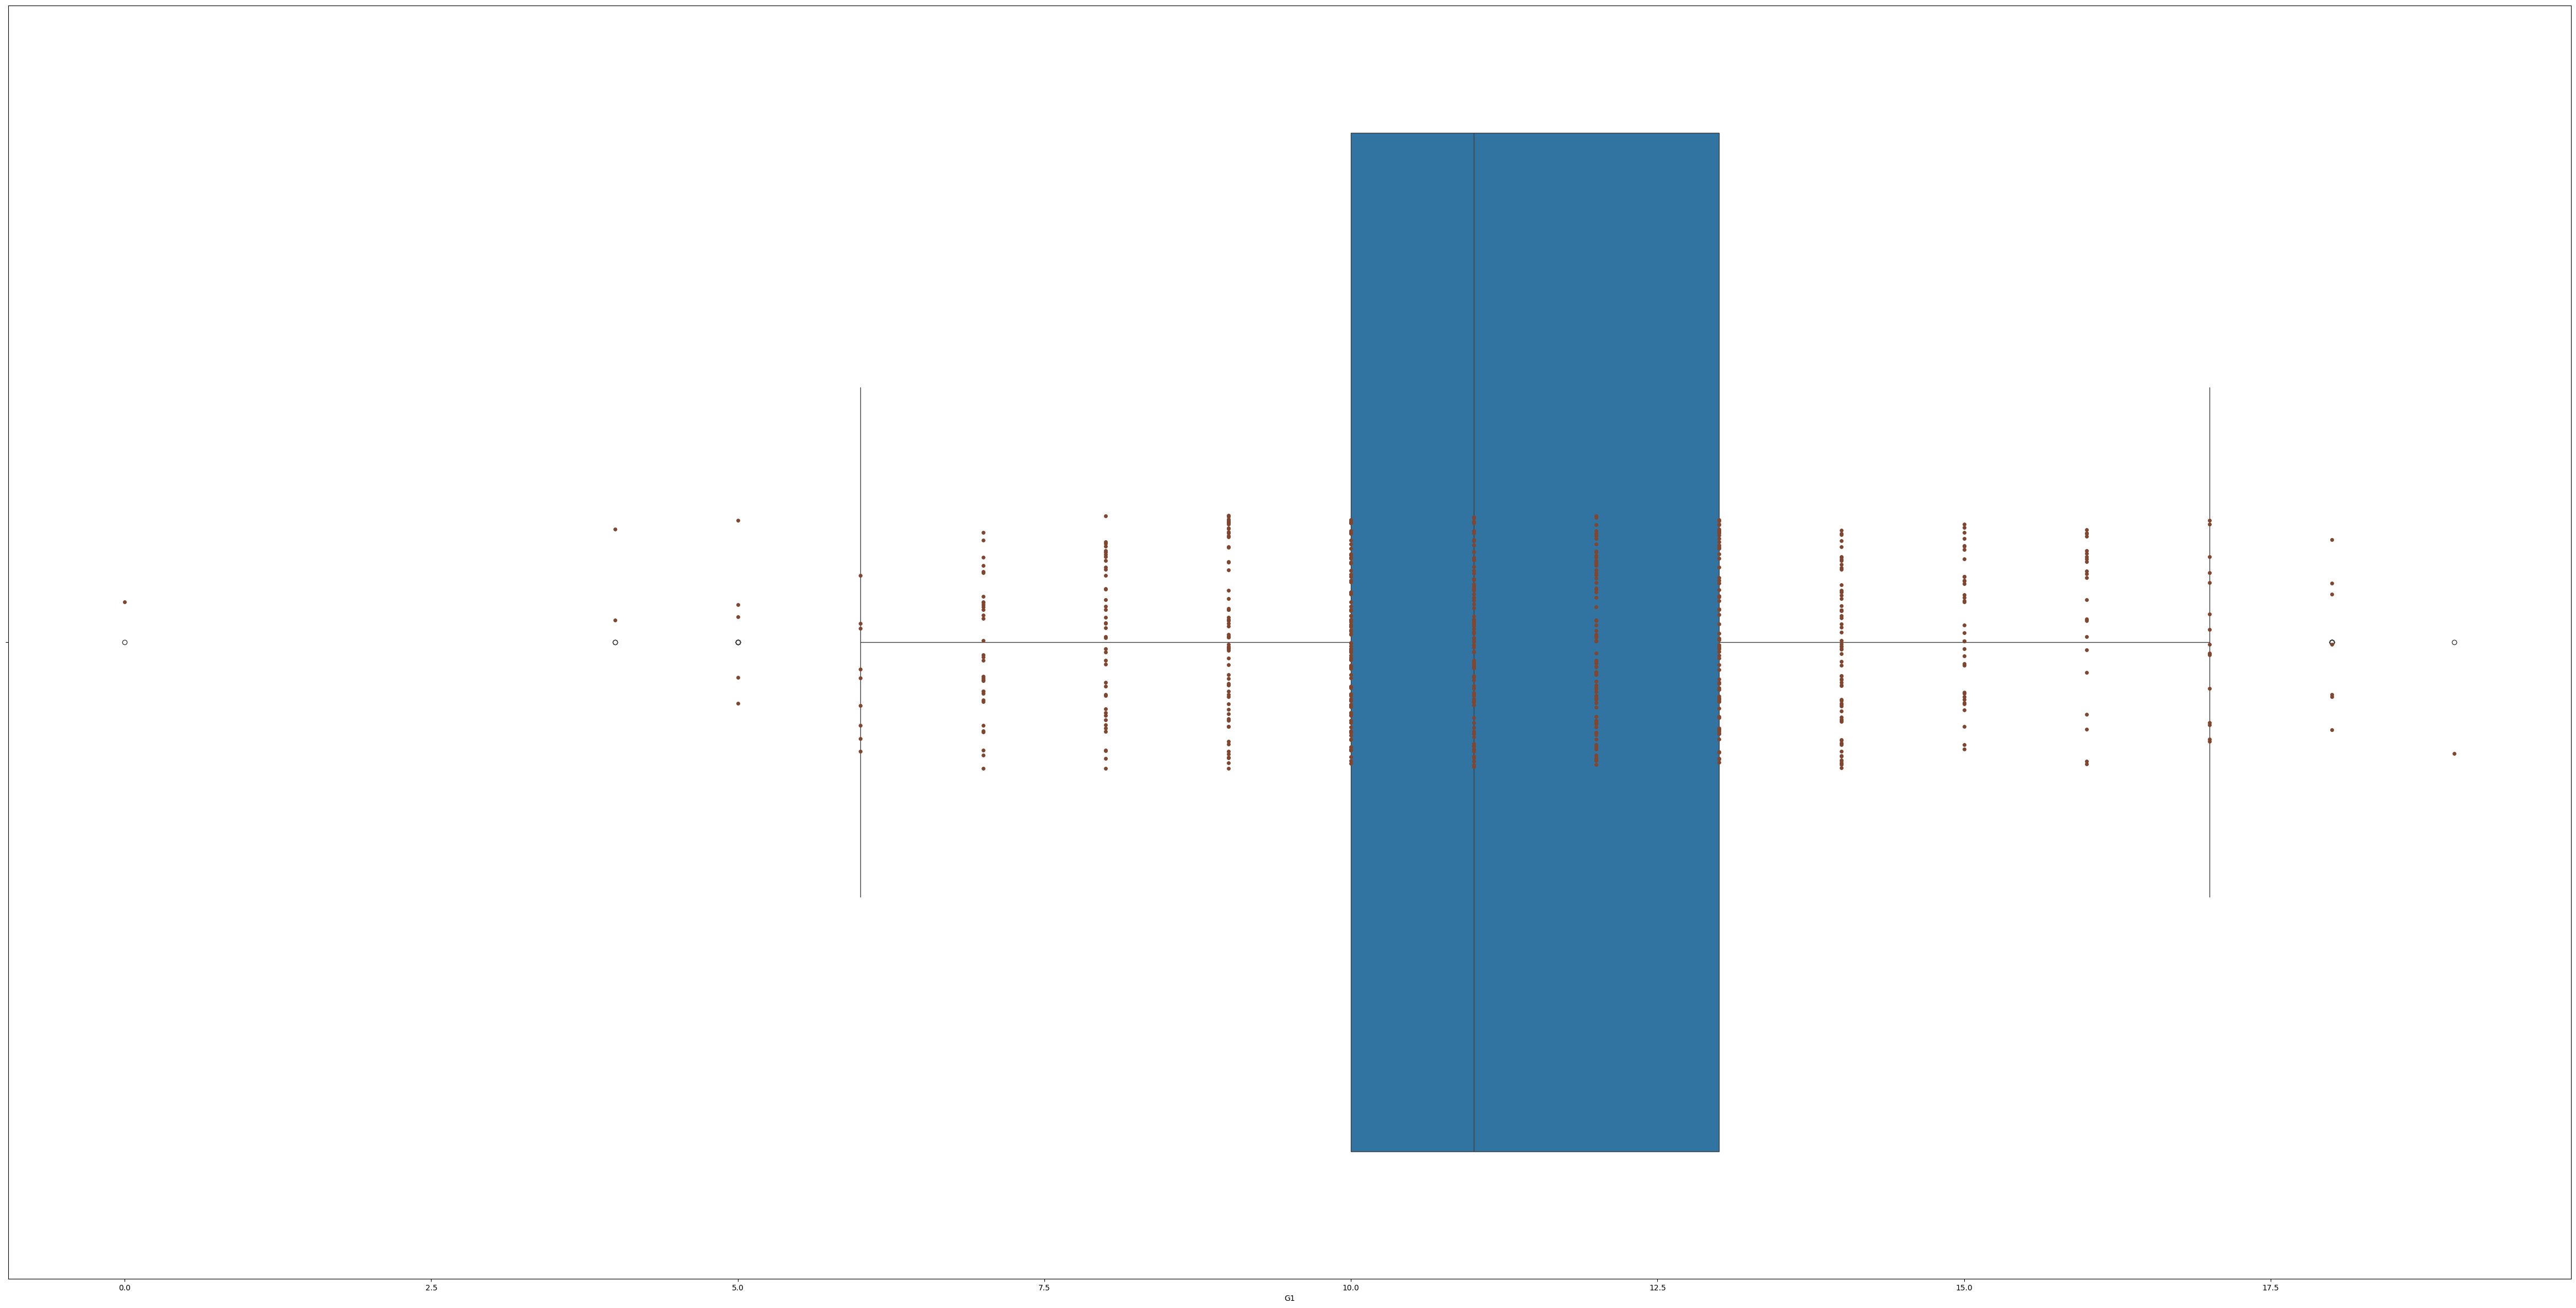

In [96]:
# revision de valores atipicos en feature 'G1'
plt.figure(figsize = (60,30))
sns.boxplot(x='G1', data=df)
sns.stripplot(x='G1', data=df, color="#804630")

<Axes: xlabel='G2'>

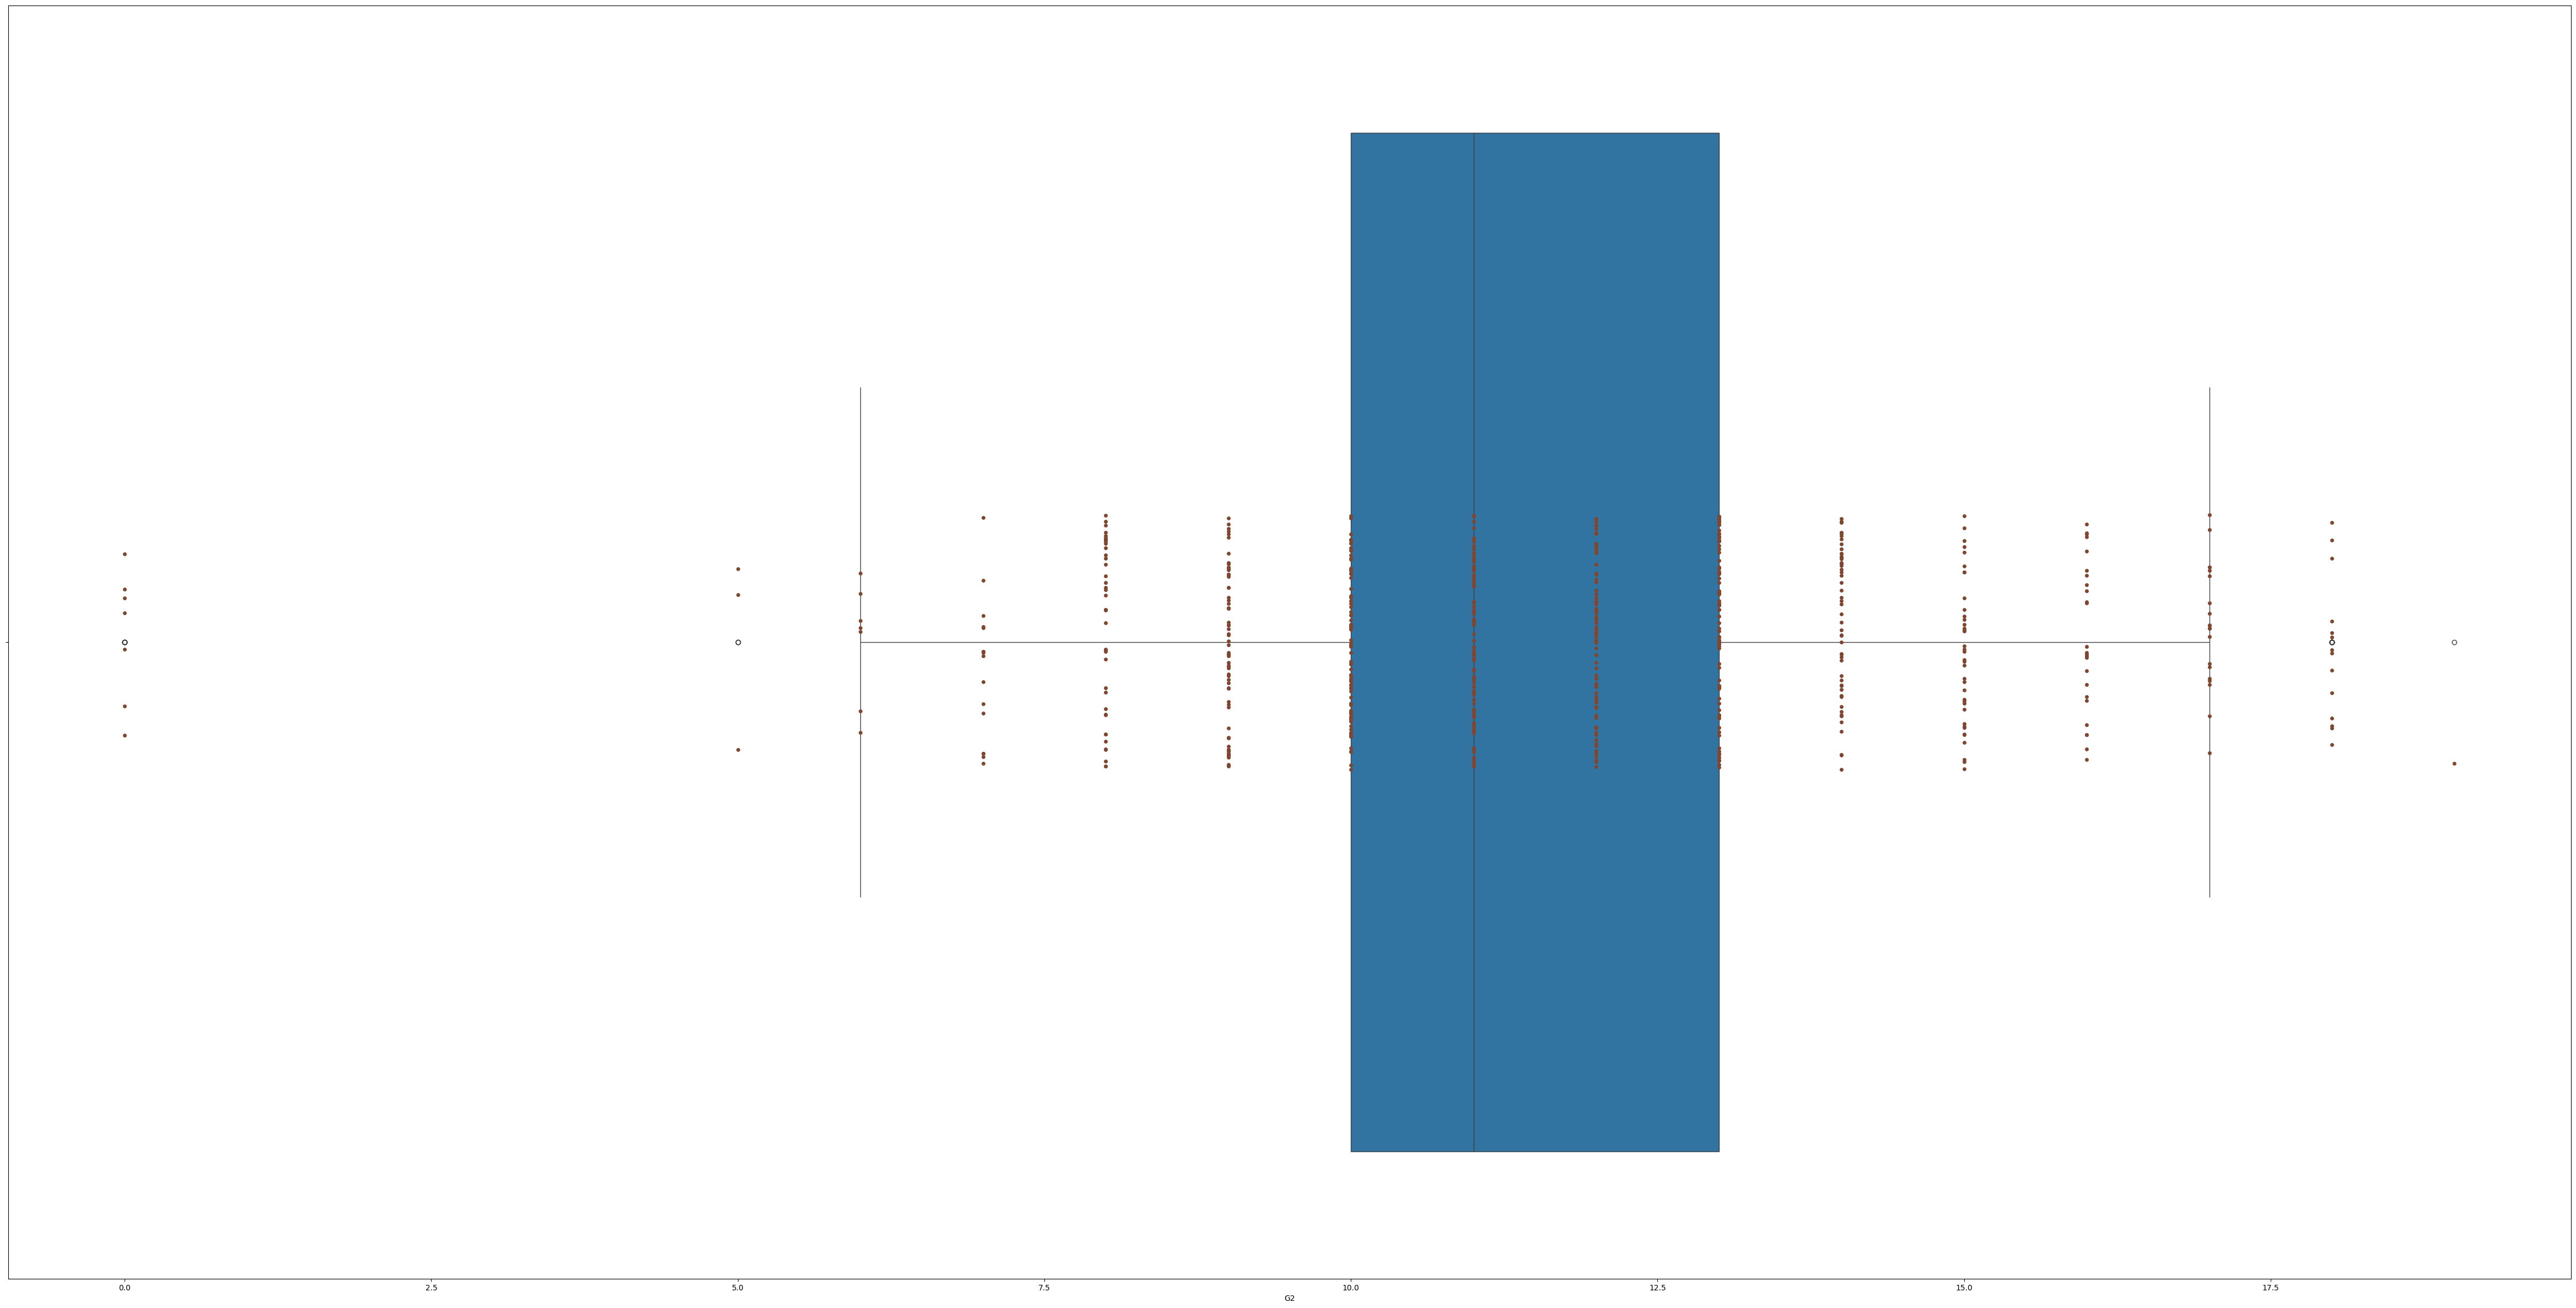

In [97]:
# revision de valores atipicos en feature 'G2'
plt.figure(figsize = (60,30))
sns.boxplot(x='G2', data=df)
sns.stripplot(x='G2', data=df, color="#804630")

In [98]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcular el Z-score solo para las columnas numéricas
z_scores = np.abs(stats.zscore(numeric_df))

# Filtrar el DataFrame original basado en el Z-score de las variables numéricas
df = df[(z_scores < 3).all(axis=1)]
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False
5,16,4,3,1,2,0,5,4,2,1,...,False,True,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,18,4,4,3,1,0,4,4,3,2,...,False,True,False,True,False,True,False,True,False,True
644,19,2,3,1,3,1,5,4,2,1,...,False,True,True,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,True,False,True,True,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,True,False,False,True,False,True,True,False


<Axes: xlabel='G1'>

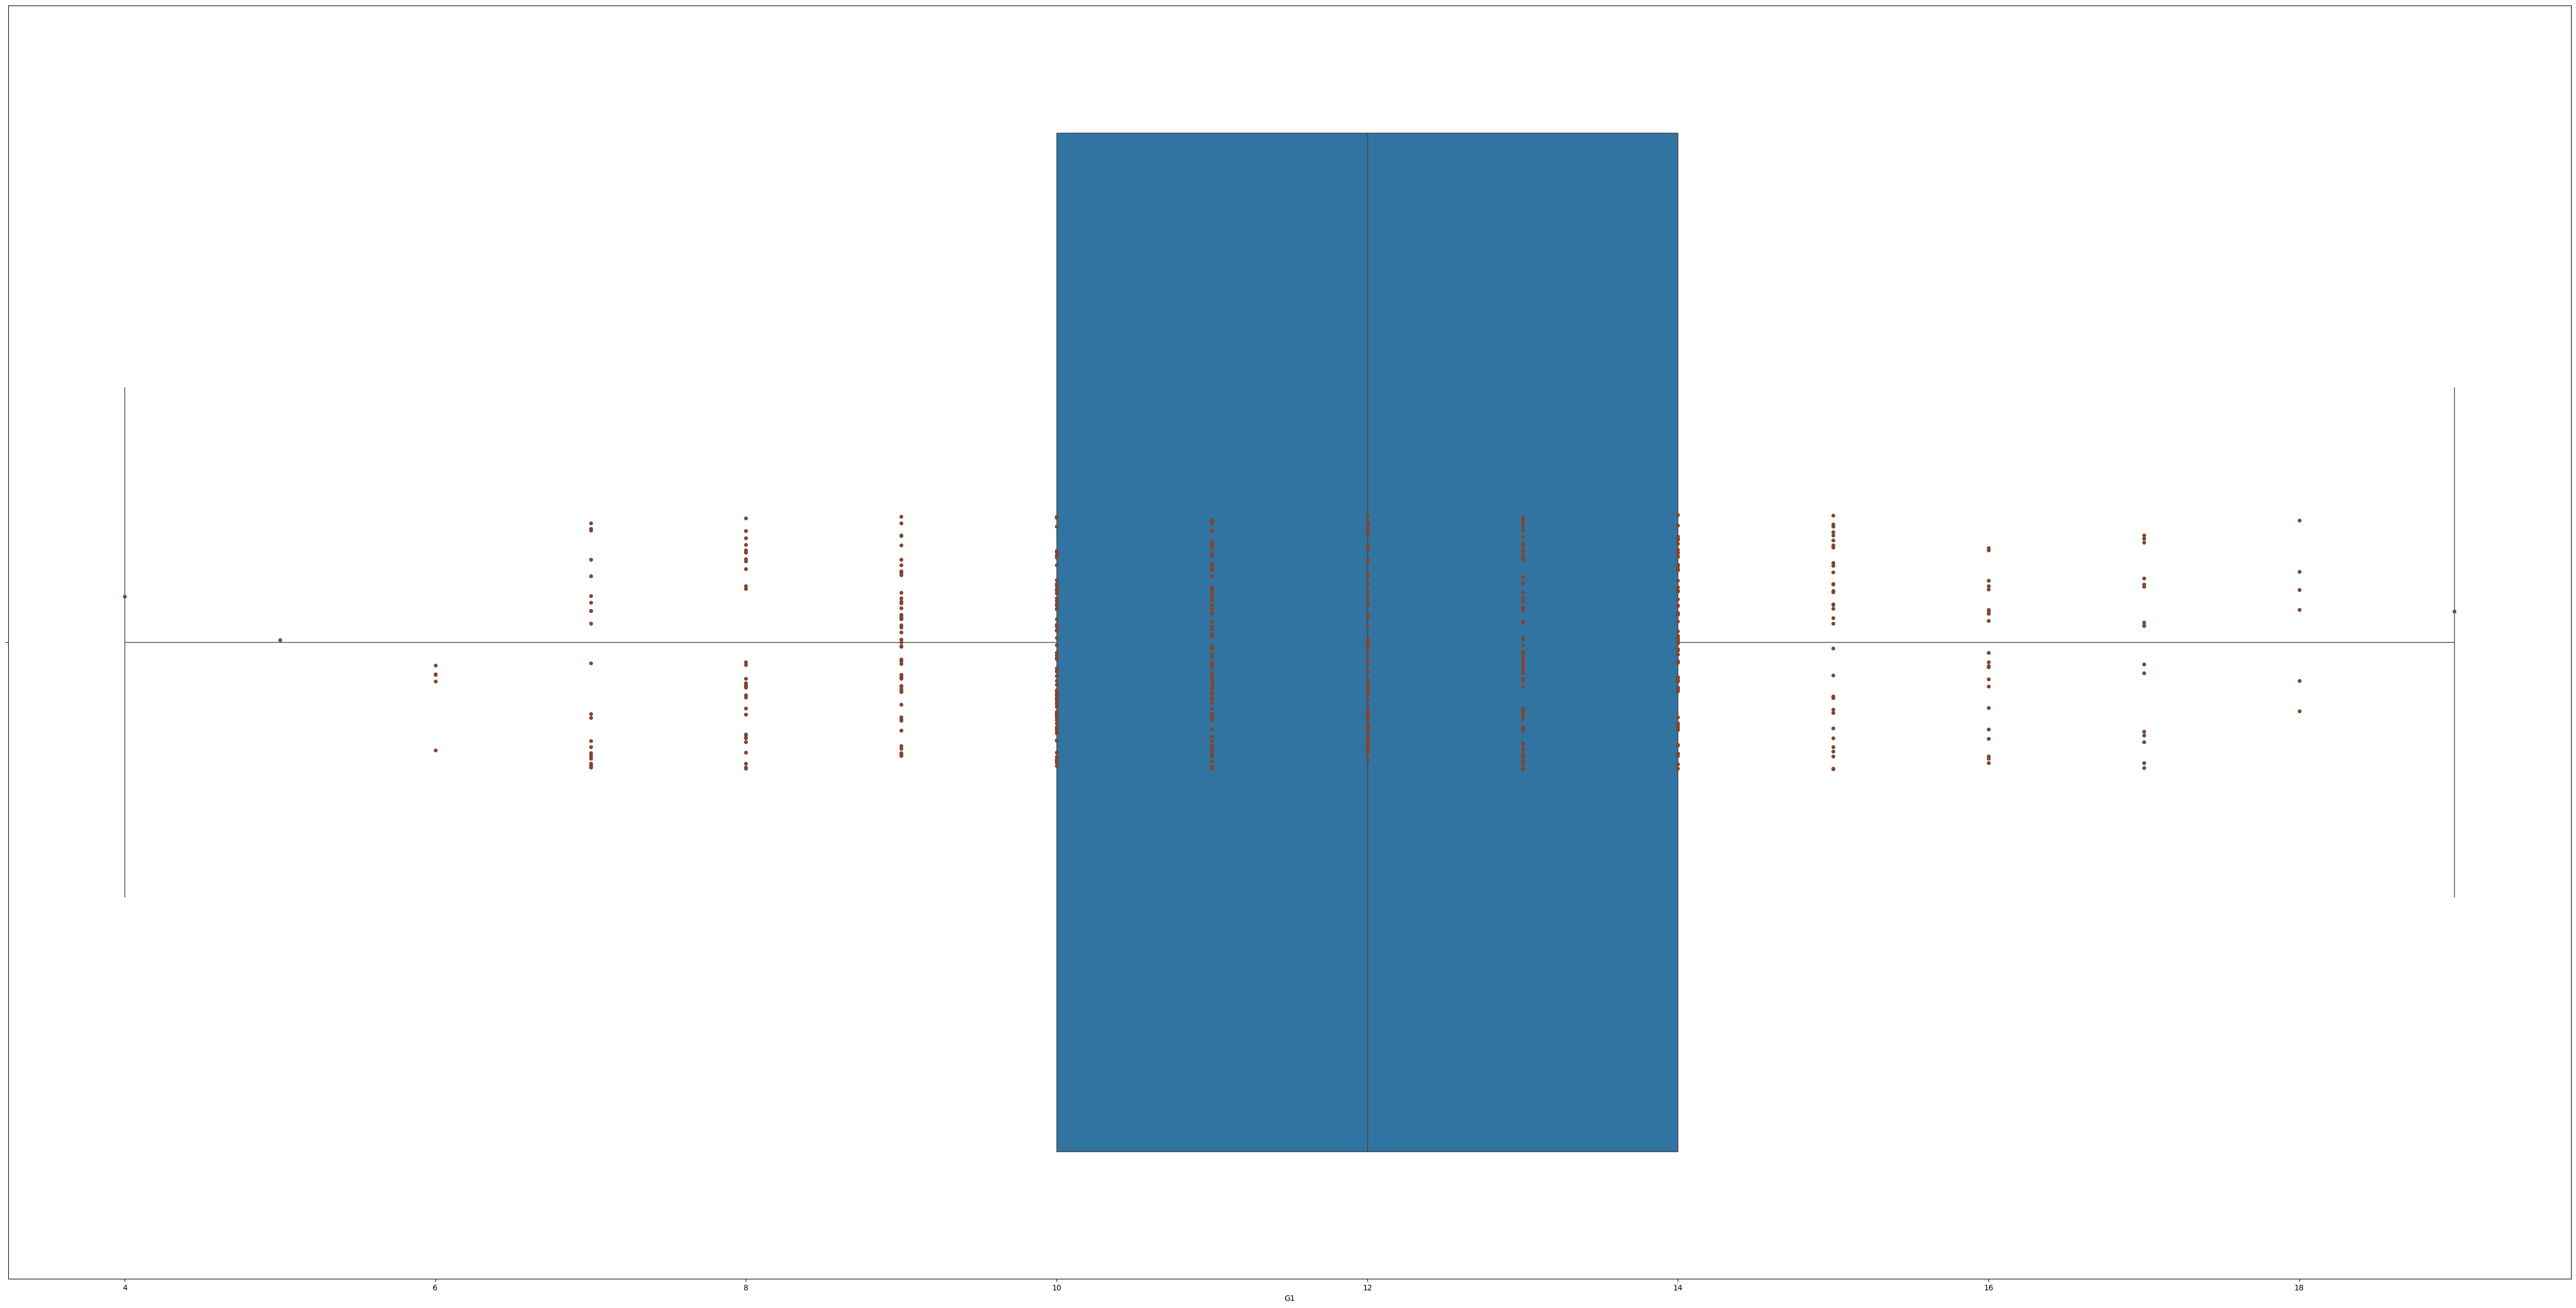

In [99]:
# revision de valores atipicos en feature 'G1'
plt.figure(figsize = (60,30))
sns.boxplot(x='G1', data=df)
sns.stripplot(x='G1', data=df, color="#804630")

<Axes: xlabel='G2'>

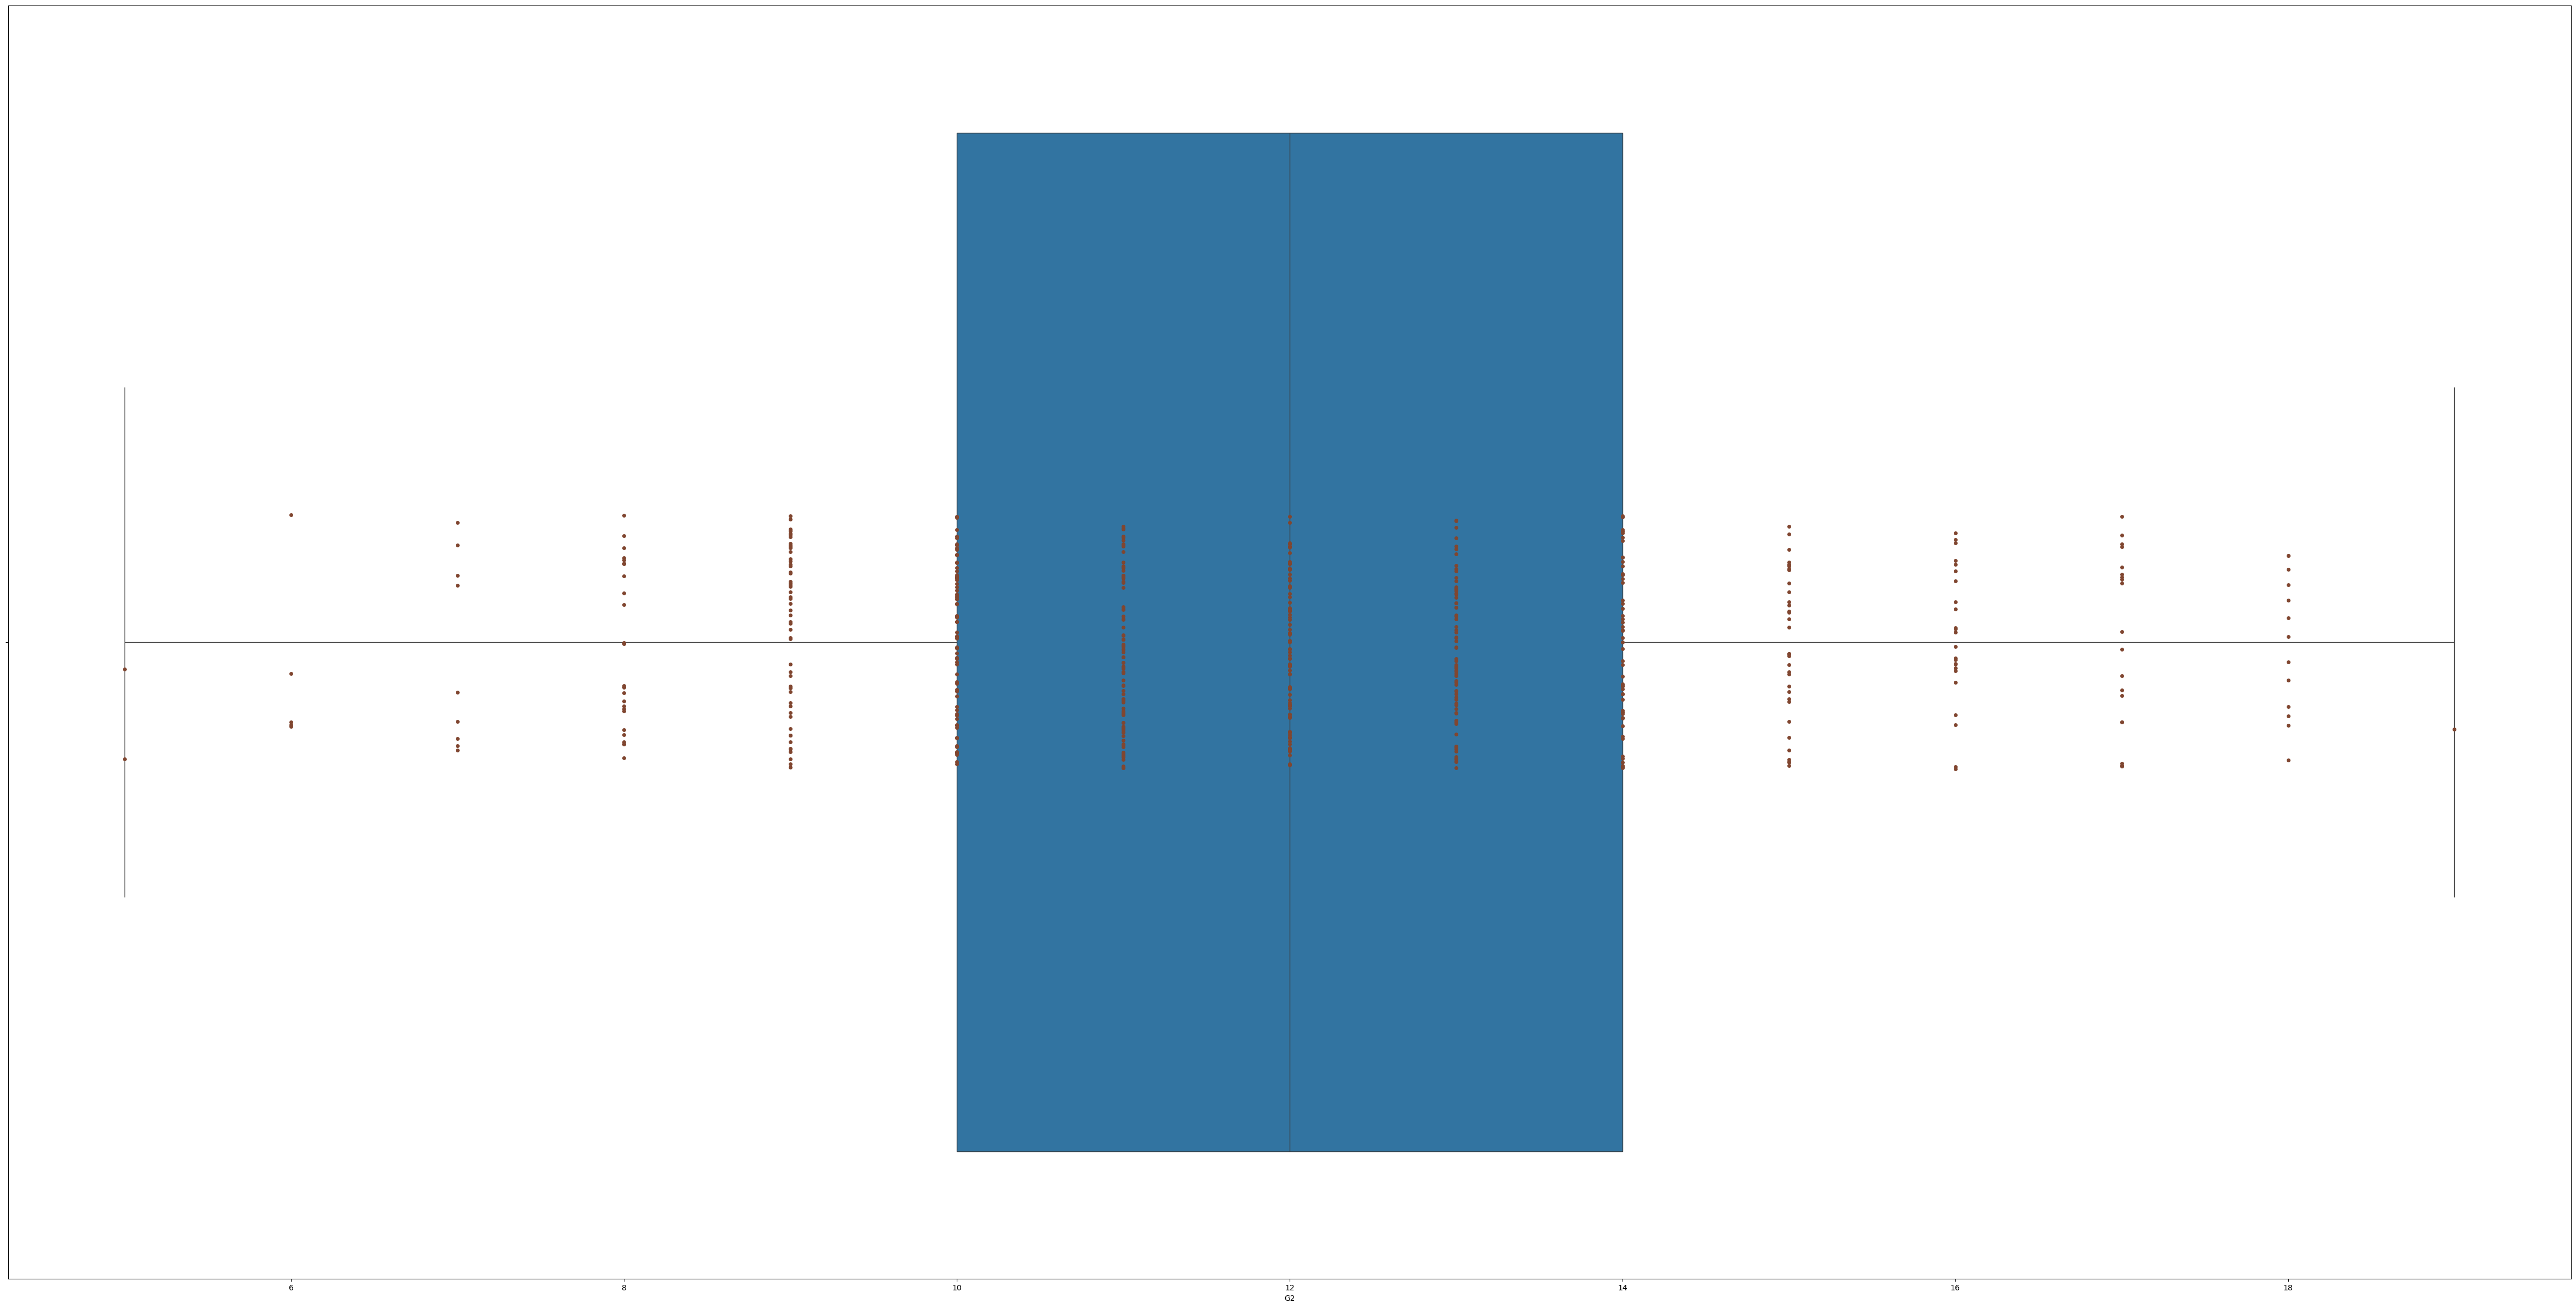

In [100]:
# revision de valores atipicos en feature 'G2'
plt.figure(figsize = (60,30))
sns.boxplot(x='G2', data=df)
sns.stripplot(x='G2', data=df, color="#804630")

### **Feature Selection**

In [101]:
#Separar las características (features) y la variable objetivo (target)
x = df.drop('G3', axis=1) #creacion de un nuevo DataFrame
y = df['G3']

In [102]:
#all_features es una lista con los nombres de todos los feature
all_features = x.columns
all_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Tomar un objeto de la biblioteca para utilizar el modelo.
# Utilizar el criterio de Gini para definir la importancia de las características.
# creacion de una instancia de  clasificador de random forest
rfc = RandomForestClassifier(random_state=0) 

In [104]:
# entrenar el modelo de random forest utilizando x y etiquetas y
rfc.fit(x, y)

RandomForestClassifier(random_state=0)

In [105]:
# seleccion de caracteristicas importantes 
selector = SelectFromModel(estimator=rfc, threshold="mean")

In [106]:
# entrenamiento del selector de caracteristicas
selector.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                threshold='mean')

In [107]:
# obtener las caracteristicas seleccionadas
selected_features = all_features[selector.get_support(indices=True)]
selected_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

### **Model and Optimization**

In [108]:
# modelo de regresion de random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# features independientes y target variable
features = df[selected_features]  # Features
target = df['G3']  # Target variable

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicializar la regresión de random forest con parámetros específicos
RFR = RandomForestRegressor(random_state=100, criterion='squared_error', max_depth=30, min_samples_leaf=5, n_jobs=1)

# Entrenar la regresión
RFR.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred = RFR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("RFR Mean Squared Error MSE:", mse)
print("RFR Root Mean Squared Error RMSE:", rmse)
print("RFR R^2 Score:", r2)

RFR Mean Squared Error MSE: 0.6438355783419977
RFR Root Mean Squared Error RMSE: 0.8023936554721739
RFR R^2 Score: 0.8867643246763317


### **Optimizacion**

In [109]:
# Uso de búsqueda en cuadrícula para obtener el mejor rendimiento del modelo de regresión de bosque aleatorio (OPTIMIZACIÓN)
from sklearn.model_selection import GridSearchCV
number = [5,11,13,41,42,101]
numbers = list(range(1, 31))
param_grid = {'criterion': ["squared_error", "absolute_error"],
              'random_state' : number,
              'n_jobs' : [1, -1],
              'max_depth' :  numbers}
grid = GridSearchCV(RandomForestRegressor(),param_grid,cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

KeyboardInterrupt: 

In [103]:
grid.best_estimator_

RandomForestRegressor(max_depth=4, n_jobs=1, random_state=11)

In [104]:
grid_predictions = grid.predict(X_test)

mse = mean_squared_error(y_test, grid_predictions)

rmse = sqrt(mse)

r2 = r2_score(y_test, grid_predictions)

print("Optimaized RFR Mean Squared Error MSE:", mse)
print("Optimaized RFR Root Mean Squared Error RMSE:", rmse)
print("Optimaized RFR R^2 Score:", r2)

Optimaized RFR Mean Squared Error MSE: 0.6429873456107632
Optimaized RFR Root Mean Squared Error RMSE: 0.8018649173088714
Optimaized RFR R^2 Score: 0.8869135090479072


In [110]:
# Obtener la lista de parámetros disponibles en el modelo de regresión de random forest
parameters = RandomForestRegressor().get_params().keys()

# Imprimir la lista de parámetros disponibles
print(parameters)

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


### **Guardar modelo**

In [86]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(RFR, 'modelo_random_fores_entrenado.pkl')

print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.
